In [72]:
%matplotlib inline

In [73]:
import fipy as fp

In [74]:
from matplotlibElPhFViewer import MatplotlibElPhFViewer
def viewElPhF(filename, L="3.2 nm", nx=1200):
    L = fp.Variable(L)
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx/L)

    xi = fp.CellVariable(mesh=mesh, name=r"$\xi$")
    phi = fp.CellVariable(mesh=mesh, name=r"$\phi$")  
    interstitials = [
        fp.CellVariable(mesh=mesh, name="$e^-$")
    ]

    substitutionals = [
        fp.CellVariable(mesh=mesh, name="$M^+$"),
        fp.CellVariable(mesh=mesh, name="$A^-$")
    ]

    N = fp.CellVariable(mesh=mesh, name="$N$")
    
    components = interstitials + substitutionals + [N]
    
    for j in components:
        j.Y = fp.CellVariable(mesh=mesh, name=j.name)

    interstitials[0].z   = -1
    substitutionals[0].z = +2
    substitutionals[1].z = -2
    N.z                  = 0

                         
    values = fp.numerix.loadtxt(filename, skiprows=1, unpack=True)
    
    xi.setValue(values[1])
    phi.setValue(values[2])
    
    _start = 3
    for j, mu in zip(interstitials + substitutionals,
                     values[_start:_start+len(interstitials + substitutionals)]):
        j.setValue(mu)

    _start = 3 + len(interstitials + substitutionals)
    for j, Y in zip(components,
                     values[_start:_start+len(components)]):
        j.Y.setValue(Y)

    charge = fp.CellVariable(mesh=mesh, value=N.z)
    for i in interstitials + substitutionals:
        charge += i.z * i.Y

    viewer = MatplotlibElPhFViewer(phase=xi,
                           potential=phi,
                           components=[i.Y for i in components],
                           charge=charge,
                           potentials=[i - i[...,0] for i in interstitials + substitutionals],
                           limits={
                               'phasemax':1.,
                               'phasemin':0.,
                           })


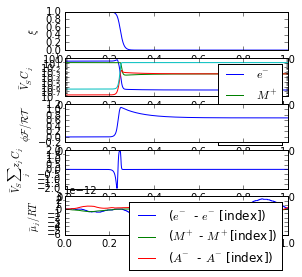

In [14]:
viewElPhF("0.0_V.tsv")

In [4]:
%%bash

smt configure --executable=python
smt configure --labelgenerator=uuid
smt configure --on-changed=store-diff
smt configure --addlabel=parameters


Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly


In [75]:
import json
import pandas

!smt export
with open(".smt/records_export.json") as ff:
    data = json.load(ff)
    
df = pandas.DataFrame(data)

In [76]:
df[["label","outcome","parameters"]]

,label,outcome,parameters
0,e9b49b56a262,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
1,f77add92df45,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
2,218281361c08,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
3,1635bfdcd15d,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
4,3836686d540a,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
5,b1f699022f48,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
6,f4e2781a9edb,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
7,2e3a7ed8488a,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
8,895e3ae74cb7,,"{u'content': u'{ ""concentration"": ""0.01 mo..."
9,8fc0a148a8d0,,"{u'content': u'{ ""concentration"": ""0.01 mo..."


In [77]:
df.keys()

Index([u'datastore', u'dependencies', u'diff', u'duration', u'executable',
       u'input_data', u'input_datastore', u'label', u'launch_mode',
       u'main_file', u'outcome', u'output_data', u'parameters', u'platforms',
       u'reason', u'repeats', u'repository', u'script_arguments',
       u'stdout_stderr', u'tags', u'timestamp', u'user', u'version'],
      dtype='object')

In [78]:
!ls Data

018e9df53d51  35261e25446e  652dd49d2641  98a3c23a1edc	d101bf662a59
02867affb5c8  354238146dbf  654867585693  98eb5e58c85b	d2a7bfc4e59b
074ac4e3502a  36e5d72eb5d1  66c5674ed6c5  99d7b3183029	d33567c656ce
0780988bfc3e  37660df7e7ae  68d578073c86  9a3fa22ef269	d3ba11405937
07ce06cfd296  3825a4a252ed  695b0ad4b2ce  9bda488363bf	d3ded9a5ec79
081c813cff7d  3836686d540a  69d4383ce9bd  9e565741fce5	d4931907cbc6
081e2ab1ae10  3abc3baf65f7  6a1fa088a17a  9ea293832c2e	d4b845bf1bb6
08a8a365f5b7  3d0e2ebb73fb  6a240a5c3ffd  9f3969431e28	d56580f2953a
0986043b5350  3d42eb7b16d1  6b75c8abe543  a02ececda7e0	d6f6706854cb
0a6d13ff5dc2  3f03745e8a56  6c4121114c62  a08d7c8393cd	dbd08edb32d2
0a88469f19b1  3f237dae1e61  6c6d107a1b57  a3ac99eabcd4	dc6495d3e822
0eecf12c1142  417798bd5001  6d3160d33a8a  a4c016a600a2	de7c9be0db72
11eae82b6b70  4207535bdde0  6d797e483606  a5455fd0af7a	deadc0e82a43
13ff46b2c656  43e4edf98b7e  6ee4cd28b7ac  a67822c87421	df98247646b2
15c3708236cc  45888d067545  6f69fb191f73  a91064

In [79]:
!ls Data/ce503af2e3b1/

ls: cannot access Data/ce503af2e3b1/: No such file or directory


In [80]:
!cat Data/ce503af2e3b1/test.txt

cat: Data/ce503af2e3b1/test.txt: No such file or directory


In [81]:
for r in df[["parameters"]].iterrows():
    print r[1]["parameters"]

{u'content': u'{\n    "concentration": "0.01 mol/l", \n    "galvani_potential": "0.186868686869 V", \n    "ncells": 1200, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "e9b49b56a262"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentration": "0.01 mol/l", \n    "galvani_potential": "0.181818181818 V", \n    "ncells": 1200, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "f77add92df45"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentration": "0.01 mol/l", \n    "galvani_potential": "0.176767676768 V", \n    "ncells": 1200, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "218281361c08"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentration": "0.01 mol/l", \n    "galvani_potential": "0.171717171717 V", \n    "ncells": 1200, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "1635bfdcd15d"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{

In [82]:
def ppprint(s):
    print type(s)

In [83]:
def get_concentration(d):
    return json.loads(d["content"])['concentration']

In [84]:
def parameters2json(d):
    return json.loads(d["content"])

In [40]:
df[df["parameters"].apply(get_concentration) == "0.25 mol/l"]

,datastore,dependencies,diff,duration,executable,input_data,input_datastore,label,launch_mode,main_file,...,platforms,reason,repeats,repository,script_arguments,stdout_stderr,tags,timestamp,user,version
90,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,85.520260,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",c7278979f934,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-07 19:50:22,,4297d09061a662818e4ac175471996abf9154665
91,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,135.958785,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",26c3bbc1f1ef,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-07 19:45:28,,4297d09061a662818e4ac175471996abf9154665
92,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,106.697502,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",aaea447f1e49,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-07 19:40:21,,4297d09061a662818e4ac175471996abf9154665
93,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,89.438160,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",15c3708236cc,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-07 19:37:52,,4297d09061a662818e4ac175471996abf9154665
94,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,86.395836,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",cb1e60e6ac86,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-07 19:35:10,,4297d09061a662818e4ac175471996abf9154665
95,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,104.921342,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",21ebb55b2d39,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-07 19:30:55,,4297d09061a662818e4ac175471996abf9154665
96,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/notes.ipynb b/notes.ipynb\nindex ...,86.422169,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSyste

In [41]:
df["concentration"] = df["parameters"].apply(get_concentration)

In [46]:
pandas.DataFrame(df["parameters"].apply(parameters2json), columns=["galvani_potential", "concentration"])

,galvani_potential,concentration


In [85]:
df2 = pandas.DataFrame(list(df["parameters"].apply(parameters2json)))

In [51]:
df2[df2["concentration"] == "0.25 mol/l"]

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
90,0.25 mol/l,0.5 V,1200,10,1,c7278979f934
91,0.25 mol/l,0.494949494949 V,1200,10,1,26c3bbc1f1ef
92,0.25 mol/l,0.489898989899 V,1200,10,1,aaea447f1e49
93,0.25 mol/l,0.484848484848 V,1200,10,1,15c3708236cc
94,0.25 mol/l,0.479797979798 V,1200,10,1,cb1e60e6ac86
95,0.25 mol/l,0.474747474747 V,1200,10,1,21ebb55b2d39
96,0.25 mol/l,0.469696969697 V,1200,10,1,462c7dfb912a
97,0.25 mol/l,0.464646464646 V,1200,10,1,0a88469f19b1
98,0.25 mol/l,0.459595959596 V,1200,10,1,1f04304c36cb
99,0.25 mol/l,0.454545454545 V,1200,10,1,b1c7bffba6ee


In [86]:
import os
def load_result(label):
    result = fp.numerix.loadtxt(os.path.join("Data", label, "test.txt"))
    return dict(scaled_galvani_potential=result[0], surface_energy=result[1], surface_charge=result[2])

In [87]:
df3 = pandas.DataFrame(list(df2["sumatra_label"].apply(load_result)))

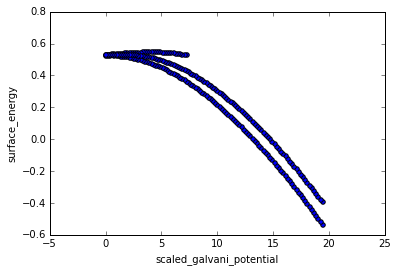

In [88]:
df3.plot.scatter('scaled_galvani_potential', 'surface_energy')

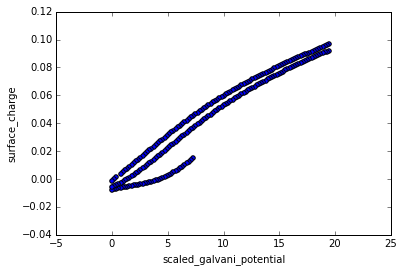

In [89]:
df3.plot.scatter('scaled_galvani_potential', 'surface_charge')

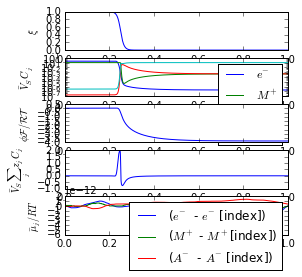

In [66]:
viewElPhF(os.path.join("Data", "17c4be819472", "output.tsv"))